## Importing necessary libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Reading prediction file

In [2]:
preds = pd.read_csv("predictions.csv")

## Binning revenue values into classes

In [3]:
truths = pd.read_csv("pruned_df.csv")["totalrevenue"]

quantiles = [0.25, 0.5, 0.75, 1]

valborders = [0]

for i, q in enumerate(quantiles):
    quantile = truths.quantile(q)
    if i > 0:
        quantile += 0.000001
    valborders.append(quantile)
        
valborders

[0, 0.1008922, 0.234601, 0.4699724, 7.4779154000000005]

## Assigning classes for predictions and ground truths

In [4]:
labels = [1,2,3,4]

preds['class'] = pd.cut(preds['Truth'], bins=valborders, labels=labels)
preds['pred_class'] = pd.cut(preds['Prediction'], bins=valborders, labels=labels)

In [5]:
preds.head()

,Prediction,Truth,class,pred_class
0,1.1491,1.0003,4,4
1,0.3365,0.5203,4,3
2,0.3127,0.8795,4,3
3,0.3313,0.4051,3,3
4,0.1322,0.3196,3,2


# Accuracy

In [6]:
acc = accuracy_score(preds['class'], preds['pred_class'])

print("Model accuracy:", np.round(acc,4))

Model accuracy: 0.8313


# F1-Score

In [7]:
print("Weighted F1 Score:", np.round(f1_score(preds['class'], preds['pred_class'], average="weighted"),4))
print("Macro F1 Score:", np.round(f1_score(preds['class'], preds['pred_class'], average="macro"),4))
print("Micro F1 Score:", np.round(f1_score(preds['class'], preds['pred_class'], average="micro"),4))

Weighted F1 Score: 0.8303
Macro F1 Score: 0.8308
Micro F1 Score: 0.8313


# Confusion Matrix

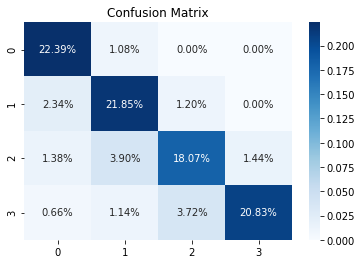

In [8]:
cf_matrix = confusion_matrix(preds['class'], preds['pred_class'])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
_ = plt.plot()